# <span style='font-family:Inter Black'> Geometric Brownian Motion </span>

A stochastic process $S_t$ is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$$
\begin{equation} dS_{t} = \mu S_{t}\,dt+\sigma S_{t}\,dW_{t} \tag{1} \end{equation}
$$


For an arbitrary initial value $S_0$ the above SDE has the analytic solution:

$$
\begin{equation}
S_{t}=S_{0}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right)}\\
S_{T}=S_{t}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)(T-t)+\sigma W_{T-t}\right)}
\end{equation}
$$


## <span style='font-family:Inter'> Averages </span>


$$\widehat{g^m}(T, N) = \frac{1}{T} \ln \bigg(\frac{1}{N} \sum_1^N \bigg( \frac{\int_0^T dx_i(t)}{x_i(0)}\bigg) \bigg)$$

Taking the limit for $N \to \infty$ and $T \to \infty$ yields two different measures, hence the non ergodic property of then process.

### <span style='font-family:Inter'> Ensemble Average
    
$$E(g^m) = \lim_{N\to \infty} \widehat{g^m}(T, N) = \mu^m$$

[...]

The expected value (or ensemble average), i.e. taking the limit for  $N \to \infty$:

$$E(S_t)=S_0e^{(\mu-\sigma^2/2)t}E(e^{\sigma B_t}).$$


Since $E(e^{uZ})=e^{u^2/2}$ for every real number $u$ and every standard normal random variable $Z$, the identity $E(e^{\sigma B_t})=e^{\sigma^2 t/2}$ follows from the fact that $\sigma B_t$ is distributed like $\sigma t \sqrt{Z}$. Simplifying, one gets the same expression of $E(X_t)$ than by the direct route, namely,


$$E(S_t)=E(S_0)e^{\mu t}.$$

$$E \bigg( \frac{S_t}{S_0} \bigg) =e^{\mu t}.$$

### <span style='font-family:Inter'> Time Average
    
$$\overline{g^m} = \lim_{t\to \infty} \widehat{g^m}(T, N) = \mu^m - \frac{(\sigma^2)}{2} = \frac{d E(\ln(x))}{dt}$$

The time average:

- https://math.stackexchange.com/questions/176196/calculate-the-expected-value-of-y-ex-where-x-sim-n-mu-sigma2
- https://quant.stackexchange.com/questions/32244/geometric-brownian-motion-percentage-returns-vs-log-returns
- https://math.stackexchange.com/questions/40826/expectation-of-geometric-brownian-motion


## <span style='font-family:Inter'> Distribution And Confidence Intervals </span>    

The GBM is **lognormally distributed** with expected value and variance defined as:

$$E[S_T] = S_0 e^{\mu t}$$

$$V[S_T] = S_0^2 e^{2\mu t}(e^{\sigma^2 T}-1)$$

On the other side, the **logarithm of the GBM** is a **Brownian Motion**, distributed in the following way:

$$\ln \frac{S_T}{S_0} \sim N \bigg(\Bigr(\mu- \frac{\sigma^2}{2}\Bigr)T,\sigma^2T \bigg)$$
- C.I. :https://stats.stackexchange.com/questions/285173/how-to-calculate-confidence-interval-for-a-geometric-mean

<br>

*So, where is the optic effect that makes a bad deal look like a good deal?*

- **The expected value of the GBM is $E[S_T] = S_0 e^{\mu t}$. There is no $\sigma$ term. This follows from the log-normal probability distribution.**
- On the other side, **the expected value of the log of the GBM, which follows a brownian motion, is $\mu-\sigma^2/2$. We can see the volatility drag effect.**
- Note that the expected value of a function of $X$ is not the same as the function of the expected value of $X$, by Jensen Inequality

In [2]:
import sys
import numpy as np
import pandas as pd

sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

import matplotlib.pyplot as plt
from Finance.finance_primitive import GBM

In [24]:
S0 = 1. # Starting price
mu = 0.005  # mu
sigma = 0.15  # standard deviation
i = 3000  # number of simulations
T = 100  # time

print('Geometric Mean: {}'.format(round(mu - (sigma**2/2), 10)))
print('Arithmetic Mean: {}'.format(round(mu, 10)))

Geometric Mean: -0.00625
Arithmetic Mean: 0.005


In [5]:
gbm = GBM(S0, mu, sigma, T, i)
simulations = gbm.get_paths()

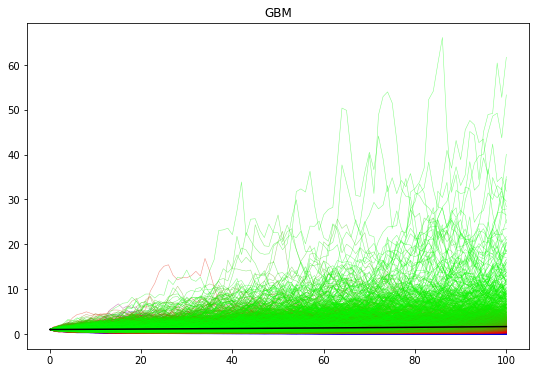

In [6]:
simulations.sort_values(simulations.index[-1], axis=1).plot(legend=False,
                                                            figsize=(9, 6), 
                                                            cmap='brg', 
                                                            linewidth=0.5,
                                                            alpha=0.5,
                                                            title='GBM')


lognormal_mean = pd.Series(np.exp(simulations.index * mu))
lognormal_mean.plot(color='black')
plt.show()

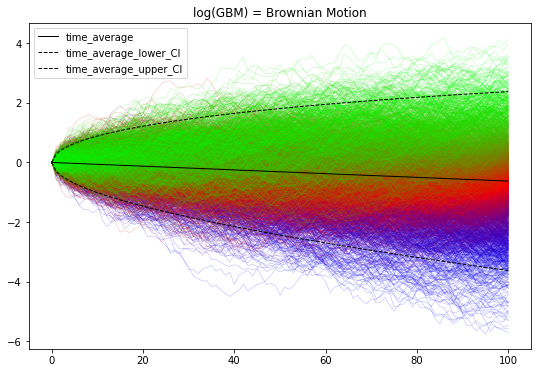

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

time_average = pd.Series(simulations.index * (mu - sigma**2/2))
time_average_upper_CI = time_average + 2 * sigma * np.sqrt(time_average.index)
time_average_lower_CI = time_average - 2 * sigma * np.sqrt(time_average.index)
time_avg_and_CI = pd.concat([time_average, time_average_lower_CI, time_average_upper_CI], axis=1)
time_avg_and_CI.columns = ['time_average', 'time_average_lower_CI', 'time_average_upper_CI']

time_avg_and_CI.loc[:, 'time_average'].plot(color='black', linewidth=1, ax=ax, legend=True, zorder=i+1)
time_avg_and_CI.loc[:, ['time_average_lower_CI', 
                        'time_average_upper_CI']].plot(color='black', 
                                                      linewidth=1, 
                                                      ax=ax, 
                                                      linestyle='dashed',
                                                      legend=True, 
                                                      zorder=i+1)

np.log(simulations).sort_values(simulations.index[-1], axis=1).plot(legend=False,
                                                            figsize=(9, 6), 
                                                            cmap='brg', 
                                                            linewidth=0.5,
                                                            alpha=0.3, 
                                                            title='log(GBM) = Brownian Motion', ax=ax)



plt.show()

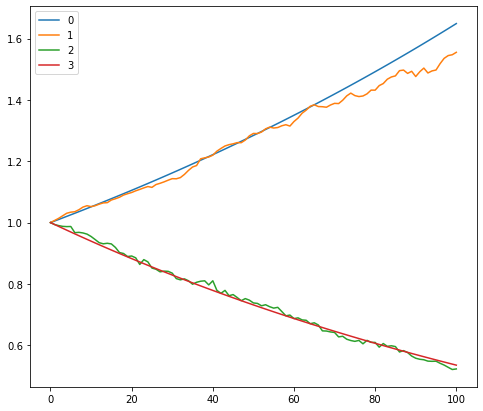

In [8]:
df = pd.concat([lognormal_mean, 
                simulations.mean(axis=1), 
                simulations.median(axis=1), 
                np.exp(time_average)], 
               axis=1)

means = df.plot(figsize=(8, 7))

## <span style='font-family:Inter'> GBM Time Average

In [20]:
gbm = GBM(S0, mu, sigma, 100000, 1)  # instantiate GBM
ta_simulation = gbm.get_paths()
time_average_GBM = gbm.time_average()

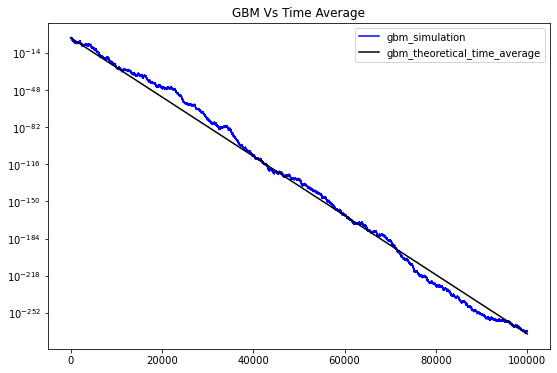

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
gbm_vs_time_avg = pd.concat([ta_simulation, time_average_GBM], axis=1)
gbm_vs_time_avg.columns =['gbm_simulation', 'gbm_theoretical_time_average']

gbm_vs_time_avg.plot(ax=ax, logy=True, color=['blue', 'black', 'red', 'red'])
ax.set_title('GBM Vs Time Average')
plt.show()

### <span style='font-family:Inter'> Confidence Interval </span>

In [15]:
n = 100
mu_hat.iloc[n:].plot(color='black')
aa = mu_hat - 2 * (1/np.sqrt(gbm_vs_time_avg.index)) * sigma_hat
bb = mu_hat + 2 * (1/np.sqrt(gbm_vs_time_avg.index)) * sigma_hat
aa.iloc[n:].plot()
bb.iloc[n:].plot()

NameError: name 'mu_hat' is not defined

## <span style='font-family:Inter'> GBM Ensemble Average </span>

In [314]:
t = 10
ea_simulation = BrownianMotion(S0, mu, sigma, t, 1000)  # ensemble average
ensemble_average_GBM = BrownianMotionEnsembleAverage(S0, mu, t)

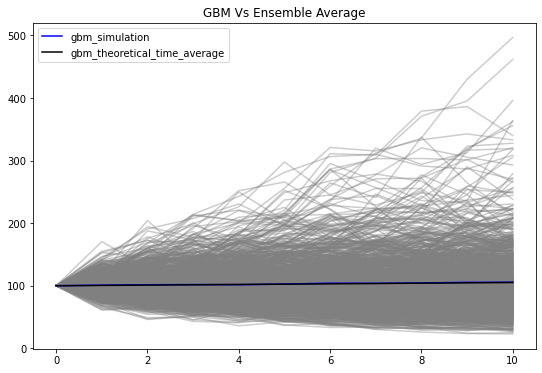

In [316]:
%matplotlib inline
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

ea_simulation.plot(ax=ax, alpha=0.4, color='gray', legend=False)
gbm_vs_ens_avg = pd.concat([ea_simulation.mean(axis=1), ensemble_average_GBM], axis=1)
gbm_vs_ens_avg.columns =['gbm_simulation', 'gbm_theoretical_time_average']
gbm_vs_ens_avg.plot(ax=ax, logy=True, color=['blue', 'black'])
ax.set_title('GBM Vs Ensemble Average')
plt.show()